In [4]:
# Imports
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load environment variables.
MAIN_PATH = os.getenv("WOONFRAUDE_PATH")
DATA_PATH = os.getenv("WOONFRAUDE_DATA_PATH")
CODEBASE_PATH = os.abspath(os.join(MAIN_PATH, 'codebase'))
NOTEBOOK_PATH = os.abspath(os.join(MAIN_PATH, 'notebooks'))
DASHBOARD_PATH = os.abspath(os.join(MAIN_PATH, 'dashboard'))

# Add system paths.
sys.path.insert(1, CODEBASE_PATH)

# Import own core module
import core, build_model
pd.set_option('display.max_columns', None)

import datetime
sns.set_style("white")
%matplotlib inline

from pydqc.data_summary import distribution_summary_pretty

In [5]:
pd.set_option('display.max_colwidth', -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# OPTIONAL: Re-download and process adres/zaken/stadia/personen tables. Uncomment next line to run these steps.
# core.main(DOWNLOAD=True, FIX=True, ENRICH=True, ADD_LABEL=True, EXTRACT_FEATURES=True, SPLIT_DATA=True, BUILD_MODEL=False)

In [6]:
dfs = core.load_dfs('1')
print(dfs.keys())

dict_keys(['adres', 'bag', 'personen', 'stadia', 'zaken'])


In [7]:
adres = dfs['adres']
zaken = dfs['zaken']
stadia= dfs['stadia']

In [8]:
# zaken alleen vanaf 2010 
zaken['year'] = zaken['begindatum'].dt.year
zaken['month'] = zaken['begindatum'].dt.month
zaken = zaken[(zaken['beh_code'] != 'W_GALERIJF') & (zaken['year'] > 2009) & (zaken['beh_code'] != 'H_WON_SCAN')]

General notes:
- Kies voor NaN of None -> kies NaN

# Data kwaliteit adres

In [15]:
adres.head()

,adres_id,straatcode,postcode,sdl_code,brt_code,pvh_cd,pvh_omschr,sbw_omschr,sbv_omschr,wzs_id,wzs_buurtcode_os_2015,wzs_buurtnaam_os_2015,wzs_buurtcombinatiecode_os_2015,wzs_buurtcombinatienaam_os_2015,wzs_22gebiedencode_os_2015,wzs_22gebiedennaam_os_2015,wzs_rayoncode_os_2015,wzs_rayonnaam_os_2015,wzs_stadsdeelcode_os_2015,wzs_stadsdeelnaam_os_2015,wzs_alternatieve_buurtennaam_os_2015,wzs_alternatieve_buurtencode_os_2015,wzs_update_datumtijd,wzs_geom,wzs_lon,wzs_lat,wzs_wijze_verrijking_geo,wzs_22gebiedencode_2015,wzs_22gebiedennaam_2015,sttnaam,hsnr,hsltr,toev,brtcombi_code,brtcombi_naam,sdl_naam,xref,yref,brt_naam,a_dam_bag,landelijk_bag,sbw_code,sbv_code,inwnrs,kmrs,hvv_dag_tek,max_vestig_dtm
0,34859.0,4227.0,1055TM,E,B,11,1 hoog,Huurwoning,"Geen Bijzonderheden, Nvt",87985896,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Bestevâerstraat,221,None,1,37,Landlust,West,118914.0,488108.0,L andlust Noord,03630000045631,0363200000045631,1.0,99.0,2.0,3.0,1952-01-24 00:00:00+01,2014-02-22 00:00:00+01
1,292087.0,31682.0,1068JK,F,E,11,1 hoog,Huurwoning,Woning In Beschermde Omgeving(Wibo),87985920,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,S. F. van Ossstraat,229,None,None,81,Osdorp-Oost,Nieuw-West,115835.0,485464.0,Osdorp Zuidoost,03630000260956,0363200000260956,1.0,7.0,1.0,2.0,2005-10-28 00:00:00+02,2019-02-06 00:00:00+01
2,292118.0,31682.0,1068JR,F,E,31,3 hoog,Eigen woning,"Geen Bijzonderheden, Nvt",87985921,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,S. F. van Ossstraat,260,None,None,81,Osdorp-Oost,Nieuw-West,115705.0,485454.0,Osdorp Zuidoost,03630000260987,0363200000260987,2.0,99.0,1.0,4.0,None,2005-05-30 00:00:00+02
3,162578.0,18546.0,1011RH,A,I,41,4 hoog,Huurwoning,"Zelfst Hat 1p, Z1",87985929,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Jonas Daniël Meijerplein,40,None,None,4,Nieuwmarkt/Lastage,Amsterdam-Centrum,122109.0,486645.0,Waterloopleinbuurt,03630000156782,0363200000156782,1.0,10.0,2.0,1.0,2013-01-17 00:00:00+01,2013-03-01 00:00:00+01
4,62438.0,7196.0,1078EC,K,A,31,3 hoog,Huurwoning,"Geen Bijzonderheden, Nvt",87985935,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Churchill-laan,205,None,3,52,Scheldebuurt,Zuid,120975.0,484459.0,Wielingenbuurt,03630000068177,0363200000068177,1.0,99.0,3.0,4.0,1985-05-15 00:00:00+02,2014-09-24 00:00:00+02


# Data kwaliteit zaken

In [397]:
zaken.head()

,adres_id,wvs_nr,begindatum,einddatum,beh_code,beh_oms,afg_code_beh,afs_code,afs_oms,afg_code_afs,kamer_aantal,nuttig_woonoppervlak,vloeroppervlak_totaal,bedrag_huur,eigenaar,wzs_id,zaak_id,wzs_update_datumtijd,mededelingen,year,month
0,213644.0,4.0,2011-06-24,2011-07-01,VMELD,Melding/zaak openen,VTBD,VCAMP,Campuscontract,VTBD,2.0,26.0,33.0,312.0,Stadgenoot,118805225,213644_4,2019-04-04 14:06:31.815258+00:00,None,2011,6
1,298274.0,1.0,2011-05-24,2011-10-05,GBS_0,Leeg B0,CNV,PNHAN,Niet Handhaven,VTBD,3.0,38.0,48.0,353.0,Particulier,118805252,298274_1,2019-04-04 14:06:31.815258+00:00,None,2011,5
2,354619.0,1.0,2011-08-01,2014-06-19,VMELD,Melding/zaak openen,VTBD,PTVEIND,Tijdelijk verhuur beeindigd,VTBD,4.0,57.0,66.0,312.0,Ymere West,118805346,354619_1,2019-04-04 14:06:31.815258+00:00,ANR(19-JUN-14): Termijn om te kunnen verlengen is verstreken. Geen reactie van Ymere op rappel gehad. Zaak nu afgesloten.\n,2011,8
3,337628.0,1.0,2011-09-20,2011-12-28,GBS_0,Leeg B0,CNV,VHVV,HVV verleend,VTBD,3.0,34.0,38.0,374.0,Particulier,118805347,337628_1,2019-04-04 14:06:31.815258+00:00,"PAW(28-DEC-11): Econ. geb. en : 93 ptn, dus hvv akkoord\nDEE(27-DEC-11): VDR. E. LUDWIG\n",2011,9
4,1970327.0,1.0,2011-09-22,2011-09-23,HAN_OVER,Overige (zie opmerkingenveld),HAN,PVKOOP,Woning is verkocht,VTBD,2.0,NaN,27.0,300.0,Particulier,118805348,1970327_1,2019-04-04 14:06:31.815258+00:00,"ROO(22-SEP-11): gesplitst, nu eig/bew",2011,9


Algemeen:
- Mededelingen veld onduidelijke functie
- Als een zaak is aangemaakt en het blijkt toch om een andere fraude categorie of eigenaar oid te gaan wordt de zaak afgesloten en een nieuwe zaak gemaakt. Dit is niet te volgen en zorgt voor vervuiling
- Voor dit project nemen we alleen meldingen vanaf 2010 omdat vanaf dan eenduidiger geregistreerd wordt 

Woonfraude label:
- Geen duidelijk label fraude in de data. Dit wordt nu met behulp van met de functie add_binary_label_zaken (zie github) regels geinteperteerd op basis van afs_oms (zaken) en sta_oms (stadia)

Categorie:
- Geen duidelijke categorieen die nu worden geinterperteerd op basis van beh_oms (zaken)
- Organische groei van categorieen (beh_oms, sta_oms)
- Onduidelijke definities categorieen (beh_oms, sta_oms)
- De categorie woningkwaliteit & vergunning en beheer laten we weg vallen omdat dit buiten de scope van T&H valt
- Missende data wordt vervangen met column mode

Numeriek/ordinal:
- Aantal kamers: Tel je hier aparte slaapkamers? Is 0 kamers dan een studio? En klopt het dat sommige huizen >11 kamers hebben? Studentenhuis, verzorgingstehuis?
- Hoe komt men aan de data voor het veld bedrag_huur?
- Missende data wordt vervangen met column mean

Datum:
- Missende data wordt vervangen met column mean




In [47]:
zaken.describe()

,adres_id,wvs_nr,kamer_aantal,nuttig_woonoppervlak,vloeroppervlak_totaal,bedrag_huur,wzs_id,year,month
count,6.903900e+04,69039.000000,65437.000000,58452.000000,67191.000000,59176.000000,6.903900e+04,69039.000000,69039.000000
mean,5.869769e+05,2.193586,2.724376,42.475313,57.867750,429.315821,1.188447e+08,2014.779284,6.558047
std,7.095699e+05,1.449467,1.918286,27.420717,91.635524,270.783378,2.296922e+04,2.394072,3.471835
min,2.867000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,1.188052e+08,2011.000000,1.000000
25%,1.423100e+05,1.000000,2.000000,30.000000,38.000000,276.000000,1.188250e+08,2013.000000,3.000000
50%,2.794990e+05,2.000000,3.000000,44.000000,53.000000,402.000000,1.188450e+08,2015.000000,7.000000
75%,4.214205e+05,3.000000,3.000000,56.000000,72.000000,544.000000,1.188648e+08,2017.000000,10.000000
max,2.071067e+06,17.000000,99.000000,959.000000,9999.000000,45026.000000,1.188848e+08,2019.000000,12.000000


In [389]:
# Percentage is nan values in column
# columns_isna_percentage(zaken)
zaken.isna().mean().round(4) * 100

adres_id                 0.00 
wvs_nr                   0.00 
begindatum               0.00 
einddatum                19.87
beh_code                 0.00 
beh_oms                  0.00 
afg_code_beh             0.00 
afs_code                 19.87
afs_oms                  19.87
afg_code_afs             19.87
kamer_aantal             5.22 
nuttig_woonoppervlak     15.33
vloeroppervlak_totaal    2.68 
bedrag_huur              14.29
eigenaar                 0.00 
wzs_id                   0.00 
zaak_id                  0.00 
wzs_update_datumtijd     0.00 
mededelingen             14.57
year                     0.00 
month                    0.00 
dtype: float64

### Open tekstvelden
Aanwezige tekstvelden kolommen: mededelingen
Welke belangrijke informatie wordt opgeslaten in open veld?

In [398]:
zaken['mededelingen']

0        None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1        None          

### Datum
Aanwezige datum columns: begindatum, einddatum, wzs_update_datumtijd
- Einddatum voor begindatum
- Als er een datum mist, wordt de missende waarde geimpute met de mean van de column. Dit zou nog anders kunnen

nan_rate: 0.0
num_uni out of 69039: 2300
min date: 2011-05-13 00:00:00
max date: 2019-04-04 00:00:00
min: 5.0
mean: 52.39634119845305
median: 52.0
max: 99.0


<Figure size 720x360 with 0 Axes>

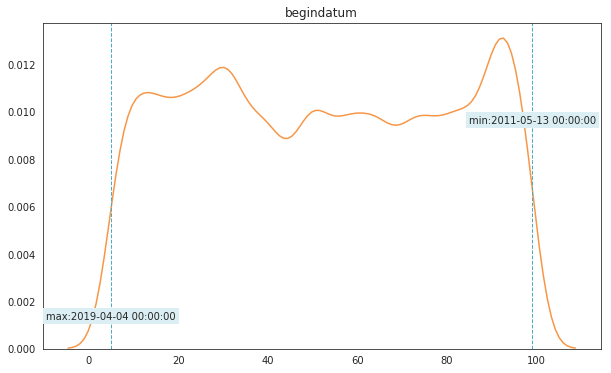

2011    7180
2012    8641
2013    8085
2014    8220
2015    7891
2016    8022
2017    9709
2018    8809
2019    2482
Name: begindatum, dtype: int64


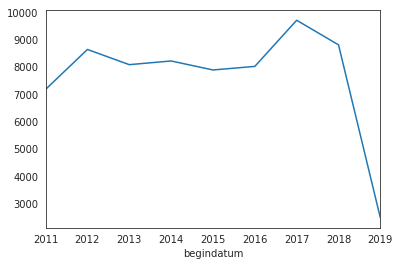

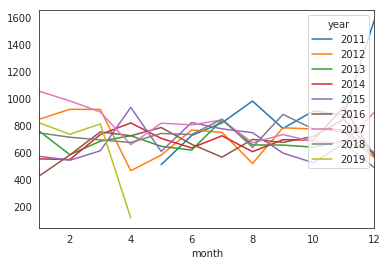

In [54]:
date_data_summary(zaken, 'begindatum')

In [392]:
# Analyse begindatum en einddatum 

# Zaken waarvan een datum in de toekomst ligt
today = pd.to_datetime('today')
zaken.loc[zaken['begindatum'] > today].shape
zaken.loc[zaken['einddatum'] > today].shape

# Accuracy fail: begindatum is eerder dan einddatum in 16 gevallen
zaken.loc[zaken['begindatum'] > zaken['einddatum']].shape

(0, 21)

(0, 21)

(16, 21)

### Categorical data, string, key
Aanwezige categorische velden: afs_oms, beh_oms

In [57]:
key_or_string_data_summary(zaken, 'beh_oms')

nan_rate: 0.0
num_uni out of 69039: 322

Melding/zaak openen             16201
Leeg B0                         7495 
ZKL Doorverhuur                 3558 
Hotline                         3219 
ZKL illegaal hotel/Shortstay    2692 
Zebra                           2104 
ZKL Doorzon Drugs               1615 
Leeg BX                         1518 
Leegstand administratief        1448 
ZL melding publiek anoniem      1340 
Name: beh_oms, dtype: int64


### Numerieke kolommen
Aanwezige numerieke kolommen: kamer_aantal, nuttig_woonoppervlak, vloeroppervlak_totaal, bedrag_huur

max range figure: mean + 3 sigma 9.0


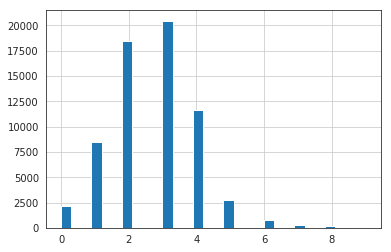

nan_rate: 0.05217340923246281
num_uni out of 65437: 21
min: 0.0
mean: 2.7243761174870484
median: 3.0
max: 99.0
outlier IQR method: value < 0.5 or > 4.5


<Figure size 720x360 with 0 Axes>

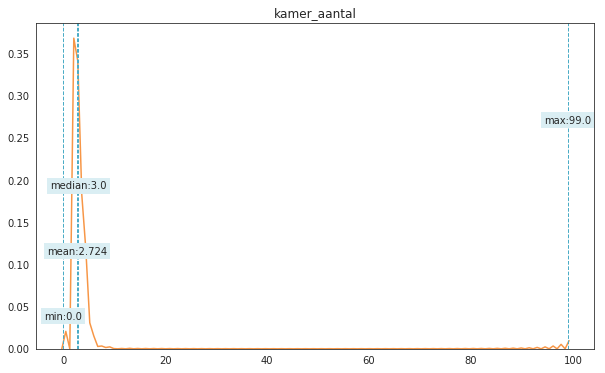

In [58]:
numeric_data_summary(zaken, 'kamer_aantal', True)

In [ ]:
# Calculate zscore for multiple columns
l = ['kamer_aantal', 'nuttig_woonoppervlak', 'vloeroppervlak_totaal', 'bedrag_huur']

for col in l:
    colnaam = col + '_z'
#     zaken[col].fillna((zaken[col].mean()), inplace=True)
    zaken[colnaam] = zscore(zaken[col])
    
outlier_threshold = 3
zaken[zaken['bedrag_huur_z'] > outlier_threshold]
zaken[zaken['bedrag_huur_z'] < outlier_threshold]

# Algemene functionaliteit

In [ ]:
def columns_isna_percentage(df):
    return df

In [39]:
# assign values

# global values
VER_LINE = "#4BACC6"
TEXT_LIGHT = "#DAEEF3"
DIS_LINE = "#F79646"

# get date of today
snapshot_date_now = str(datetime.datetime.now().date())

### Key or string

In [56]:
def key_or_string_data_summary(df, col):
    value_df = df[[col]].copy()
    nan_rate = value_df[value_df[col].isnull()].shape[0] * 1.0 / value_df.shape[0]
    num_uni = value_df[col].dropna().nunique()

    print("nan_rate: " + str(nan_rate))
    print("num_uni out of " + str(value_df[col].dropna().shape[0]) + ": " + str(num_uni))

    # check value counts
    print()
    print(value_df[col].value_counts().head(10))

In [33]:
# Example
# key_or_string_data_summary(zaken, 'beh_oms')

### Date

In [50]:
def date_data_summary(df, col):
    value_df = df[[col]].copy()
    nan_rate = value_df[value_df[col].isnull()].shape[0] * 1.0 / value_df.shape[0]
    num_uni = value_df[col].dropna().nunique()

    print("nan_rate: " + str(nan_rate))
    print("num_uni out of " + str(value_df[col].dropna().shape[0]) + ": " + str(num_uni))

    """
    #### check basic stats

    """

    # for date type, first transform into numeric
    value_df[col] = pd.to_datetime(df[col], errors="coerce")
    value_df["%s_numeric" %(col)] = (pd.to_datetime(snapshot_date_now) - value_df[col]).astype("timedelta64[M]", errors="ignore")

    date_min = value_df[col].min()
    date_max = value_df[col].max()
    print("min date: " + str(date_min))
    print("max date: " + str(date_max))

    value_min = value_df["%s_numeric" %(col)].min()
    value_mean = value_df["%s_numeric" %(col)].mean()
    value_median = value_df["%s_numeric" %(col)].median()
    value_max = value_df["%s_numeric" %(col)].max()

    print("min: " + str(value_min))
    print("mean: " + str(value_mean))
    print("median: " + str(value_median))
    print("max: " + str(value_max))

    # check distribution

    value_dropna = value_df["%s_numeric" %(col)].dropna().values
    plt.figure(figsize=(10, 5))
    plt.title(col)
    sns.distplot(value_dropna, color="#F79646", norm_hist=True, hist=False)

    # you can also use the build-in draw function
    distribution_summary_pretty(value_df, col, figsize=None, date_flag=True)
    
    # check amount of cases each year   
    print(df[col].dt.year.value_counts().sort_index())
    
    # analyse per jaar     
    df.groupby([df[col].dt.year]).size().plot()
    plt.show()
    
    # analyse per jaar per maand
    df_g = zaken.groupby([zaken['year'], zaken['month']]).size().reset_index()
    df_g = df_g.rename(columns={0:'size'})
    df_g_p = df_g.pivot(index='month', columns='year', values='size')
    df_g_p.plot()
    plt.show()

In [51]:
# Example date
# date_data_summary(zaken, 'begindatum')

### Numeric

In [52]:
def numeric_data_summary(df, col, hist):
    
    if hist == True:
        print('max range figure: mean + 3 sigma', df[col].quantile(0.9973))
        outlier_treshold = df[col].quantile(0.9973)
        df[col].hist(range=(0, outlier_treshold), bins=30)
        plt.show()
        
    value_df = df[[col]].copy()
    nan_rate = value_df[value_df[col].isnull()].shape[0] * 1.0 / value_df.shape[0]
    num_uni = value_df[col].dropna().nunique()

    print("nan_rate: " + str(nan_rate))
    print("num_uni out of " + str(value_df[col].dropna().shape[0]) + ": " + str(num_uni))

    # check basic stats

    value_min=value_df[col].min()
    value_mean=value_df[col].mean()
    value_median=value_df[col].median()
    value_max=value_df[col].max()
    
    outlier_min = df[col].quantile(.25) - ((df[col].quantile(.75) - df[col].quantile(.25)) * 1.5)
    outlier_max = df[col].quantile(.75) + ((df[col].quantile(.75) - df[col].quantile(.25)) * 1.5)

    print("min: " + str(value_min))
    print("mean: " + str(value_mean))
    print("median: " + str(value_median))
    print("max: " + str(value_max))
    print('outlier IQR method: value <', outlier_min, 'or >', outlier_max)


    # check distribution

    value_dropna = value_df[col].dropna().values
    plt.figure(figsize=(10, 5))
    plt.title(col)
    sns.distplot(value_dropna, color="#F79646", norm_hist=True, hist=False)

    #you can also use the build-in draw function
    distribution_summary_pretty(value_df, col, figsize=None, date_flag=False)

In [59]:
# Example numeric value
# numeric_data_summary(zaken, 'kamer_aantal', True)